# Mass-spring-damper experiment

Author: Simo Särkkä

## Imports

In [1]:
import numpy as np
import parallel_control.mass_model_np as mass_model_np
import matplotlib.pyplot as plt


Run LQT and plot the result

In [3]:
model = mass_model_np.MassModel(5)

print(model.Fc)

lqt, x0 = model.getLQT()

Kx_list_seq, d_list_seq, S_list_seq, v_list_seq = lqt.seqBackwardPass()
u_list_seq, x_list_seq = lqt.seqForwardPass(x0,Kx_list_seq,d_list_seq)

[[ 0.   1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-2.  -0.4  1.   0.2  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   1.   0.   0.   0.   0.   0.   0. ]
 [ 1.   0.2 -2.  -0.4  1.   0.2  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   1.   0.   0.   0.   0. ]
 [ 0.   0.   1.   0.2 -2.  -0.4  1.   0.2  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   1.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0.2 -2.  -0.4  1.   0.2]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   1. ]
 [ 0.   0.   0.   0.   0.   0.   1.   0.2 -2.  -0.4]]


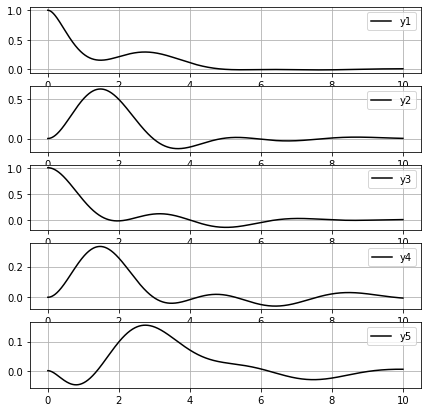

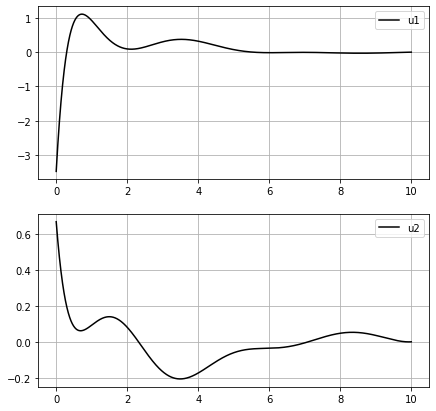

In [4]:
x_seq = np.array(x_list_seq).T
u_seq = np.array(u_list_seq).T

times = np.linspace(0,10,x_seq.shape[1])
fig, axes = plt.subplots(x_seq.shape[0]//2,1,figsize=(7, 7))
for i in range(x_seq.shape[0]//2):
    axes[i].plot(times, x_seq[2*i,:], label=('y%d' % (i+1)), color="k")
    axes[i].grid(True)
    axes[i].legend()

fig, axes = plt.subplots(2,1,figsize=(7, 7))
for i in range(2):
    axes[i].plot(times[:-1], u_seq[i,:], label=('u%d' % (i+1)), color="k")
    axes[i].grid(True)
    axes[i].legend()